<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío 1 - Limpieza de datos</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati](#section_properati)

[Inspección de la tabla sin limpieza previa](#section_inspeccion)

[Creación de función general para el análisis de columnas y sus valores](#section_creacion_de_funcion)

$\hspace{.5cm}$[Funcion my_info_columnas()](#section_funcion_1)
  
$\hspace{.5cm}$[Funcion my_colmnas_valores()](#section_funcion_2)

[Eliminacion de columnas redundantes](#section_eliminacion)


[Análisis de las variables más importantes](#section_analisis_var)

[Imputacion de valores faltante por medio de otro campo o campos calculados](#section_imputacion)

[Diagrama de expensas para los valores existentes](#section_expensas)

[Categorización del precio de los inmuebles](#section_categorizacion)

[Gráficos del Dataset](#section_graficos)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Debemos asesorar a la inmobiliaria para desarrollar un modelo de regresión que permita predecir el **precio por metro cuadrado** de una propiedad. 

El objetivo final es que el modelo que desarrollen sea utilizado como **tasador automático** a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El nombre del dataset es *properati.csv*.

Para eso deberemos:
- Efectuar una limpieza del dataset provisto. Particularmente, debemos diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [627]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns

In [628]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...".NO existe display.min_columns
pd.set_option("display.max_rows", 200)     # Limita la visualización a max 20 columnas. Si se excede genera "..."
pd.set_option("display.min_rows", 10)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
#pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo properati.csv

[volver a TOC](#section_toc)

In [629]:
# Importación del archivo de Properati:
data = pd.read_csv("properati.csv", sep = ",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [47]:
# Muestra de la tabla:
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
28938,28938,sell,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113.0,"-34.6234536,-58.3764477",-34.623454,-58.376448,22400.0,USD,395236.8,22400.0,13.0,0.0,1723.076923,NaN,NaN,NaN,1800.0,http://www.properati.com.ar/17xm3_venta_depart...,"Departamento de 2 ambientes, con bajo mesada, ...",Departamento - San Telmo,https://thumbs4.properati.com/4/mvGoVviheZmfXv...
45255,45255,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9863729,-57.5789423",-37.986373,-57.578942,125000.0,USD,2205562.5,125000.0,140.0,NaN,892.857143,NaN,NaN,4.0,NaN,http://www.properati.com.ar/193nl_venta_casa_m...,"Nos encontramos con un hermoso chalet, ubicado...",Peru 1979,https://thumbs4.properati.com/0/xe4t0OglwdcPT_...
103252,103252,sell,house,Villa Elisa,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Vil...,Argentina,Bs.As. G.B.A. Zona Sur,3427442.0,NaN,NaN,NaN,135000.0,USD,2382007.5,135000.0,NaN,69.0,NaN,1956.521739,NaN,NaN,NaN,http://www.properati.com.ar/1brol_venta_casa_v...,EN ESQUINA ENTRE CAMINOS A MTS DE AV. ARANA (4...,Casa - Villa Elisa,https://thumbs4.properati.com/5/9aSdRMeisjTbqO...
119240,119240,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6292340368,-58.4416359692",-34.629234,-58.441636,99000.0,USD,1746805.5,99000.0,45.0,39.0,2200.000000,2538.461538,NaN,NaN,1100.0,http://www.properati.com.ar/1cgdv_venta_depart...,Excelente departamento a estrenar 1 ambiente d...,Departamento en venta,https://thumbs4.properati.com/0/9M_ZhXGTircan0...
32484,32484,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0132463,-57.5552145",-38.013246,-57.555215,285000.0,USD,5028682.5,285000.0,99.0,NaN,2878.787879,NaN,NaN,3.0,NaN,http://www.properati.com.ar/1872g_venta_depart...,3 ambientes a la calle a estrenar con cochera ...,Departamento en Venta. Ambientes. Dormitorios....,https://thumbs4.properati.com/8/MDs82T54nekw6s...


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla sin limpieza previa

[volver a TOC](#section_toc)

Se realiza un análisis básico para entender los datos e información que almacena la tabla:

In [49]:
# Dimensiones:
print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (121220, 26)


In [50]:
# Tipo de datos de las columnas:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

Analizando las columnas una a una podemos ver que los tipos de datos son los correctos segun muestra el df.

In [51]:
# Nombre de las columnas:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [615]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():
data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(10))

# Revisamos que no se alteraron los tipos de datos:
data.dtypes

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean,price_usd_per_m2_prediction
6085,6085,SELL,APARTMENT,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,ARGENTINA,CÓRDOBA,3860259.0,"-31.401665,-64.160607",-31.401665,-64.160607,850000.0,ARS,841133.07,47671.12,NaN,50.0,NaN,17000.000000,6.0,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15SMM_VENTA_DEPART...,CORREDOR RESPONSABLE: JUAN MANUEL QUIROGA - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,HTTPS://THUMBS4.PROPERATI.COM/3/G9LKU26HIPF4QI...,1418.384439,1426.524689,1426.524689
89632,89632,SELL,HOUSE,CÓRDOBA,|ARGENTINA|CÓRDOBA|,ARGENTINA,CÓRDOBA,3860255.0,NaN,NaN,NaN,380000.0,USD,6704910.00,380000.00,NaN,280.0,NaN,1357.142857,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1B8WE_VENTA_CASA_C...,BATTIONI BIENES RAICES OFRECE A LA VENTA MAGNI...,CASA - VALLE ESCONDIDO,HTTPS://THUMBS4.PROPERATI.COM/1/TPJ_P_1_5UJFI_...,570.388350,713.335035,713.335035
6302,6302,SELL,HOUSE,VILLA DE MAYO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|MALVINAS A...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,NaN,"-34.5244031,-58.6827479",-34.524403,-58.682748,NaN,NaN,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15THX_VENTA_CASA_V...,CODIGO: 2692-CDT208 UBICADO EN: NEMESIO TREJO ...,EXCELENTE PROPIEDAD A LA VENTA EN Bº LOS NOGAL...,HTTPS://THUMBS4.PROPERATI.COM/6/S8I9RF48VUDZNM...,1283.018868,1339.764409,1339.764409
52567,52567,SELL,APARTMENT,RAMOS MEJÍA,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|LA MATANZA...,ARGENTINA,BS.AS. G.B.A. ZONA OESTE,3429617.0,NaN,NaN,NaN,78000.0,USD,1376271.00,78000.00,NaN,37.0,NaN,2108.108108,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19JCQ_VENTA_DEPART...,HERMOSO DEPARTAMENTO DE 2 AMBIENTES: LIVING CO...,DEPARTAMENTO EN VENTA RAMOS MEJIA / LA MATANZA...,HTTPS://THUMBS4.PROPERATI.COM/2/WZ06D4R0X28HRT...,1666.666667,1720.754481,1720.754481
73031,73031,SELL,HOUSE,LOMAS DE ZAMORA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LOMAS DE ZAM...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3431270.0,"-34.7636083,-58.3889219",-34.763608,-58.388922,105000.0,USD,1852672.50,105000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AN6L_VENTA_CASA_L...,"CASA EN LOMAS DE ZAMORA CON LOTE DE 8,66 X 20....",CASA - LOMAS DE ZAMORA,HTTPS://THUMBS4.PROPERATI.COM/7/HMR9XFBLVWT5DY...,1125.000000,1164.503788,1164.503788
16228,16228,SELL,APARTMENT,MAR DEL PLATA,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,ARGENTINA,BUENOS AIRES COSTA ATLÁNTICA,3430863.0,NaN,NaN,NaN,98000.0,USD,1729161.00,98000.00,NaN,48.0,NaN,2041.666667,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/16XVX_VENTA_DEPART...,"EXCELENTE DEPARTAMENTO EXTERNO DE 2 AMBIENTES,...",DEPTO. 2 AMB. EXT. LA PERLA,HTTPS://THUMBS4.PROPERATI.COM/6/NFFOFRNPBHBCER...,1897.500000,1958.838430,1958.838430
101520,101520,SELL,HOUSE,BURZACO,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|ALMIRANTE BR...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3435894.0,"-34.8333021,-58.4071858",-34.833302,-58.407186,70000.0,USD,1235115.00,70000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1BPH2_VENTA_CASA_B...,CODIGO: 2484-FP0345 UBICADO EN: ECHENAGUCIA 17...,BURZACO:OPORTUNIDAD CASA 3 AMB.C/LOCAL+ GARAGE...,HTTPS://THUMBS4.PROPERATI.COM/7/OM2YBCPHZKSDHH...,1125.000000,1164.503788,1164.503788
81020,81020,SELL,HOUSE,CARAPACHAY,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,NaN,"-34.5244849,-58.5374493",-34.524485,-58.537449,275000.0,USD,4852237.50,275000.00,184.0,184.0,1494.565217,1494.565217,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AXI6_VENTA_CASA_C...,VENTA CASA 4 AMBIENTES EN CARAPACHAYEXCELENTE...,CASA - CARAPACHAY,HTTPS://THUMBS4.PROPERATI.COM/0/DKJ6TBMR67UZCK...,1283.018868,1339.764409,1494.565217
73412,73412,SELL,APARTMENT,FLORIDA,|ARGENTINA|BS.AS

Unnamed: 0                              int64
operation                              object
property_type                          object
place_name                             object
place_with_parent_names                object
country_name                           object
state_name                             object
geonames_id                           float64
lat-lon                                object
lat                                   float64
lon                                   float64
price                                 float64
currency                               object
price_aprox_local_currency            float64
price_aprox_usd                       float64
surface_total_in_m2                   float64
surface_covered_in_m2                 float64
price_usd_per_m2                      float64
price_per_m2                          float64
floor                                 float64
rooms                                 float64
expenses                          

In [53]:
# Porcentaje de nulos por columnas:
(data.isnull().sum()/data.shape[0]*100).round(2)

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
dtype: float64

In [54]:
# Información general:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [55]:
# De las columnas numéricas podemos obtener ciertas estadísticas, excluyendo los valores NaN:
data.describe().round(2)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.00,102503.00,69670.00,69670.00,1.008100e+05,1.008100e+05,100810.00,81892.00,101313.00,68617.00,87658.00,7899.00,47390.00,14262.00
mean,60609.50,3574442.32,-34.63,-59.27,4.685259e+05,4.229397e+06,239700.58,233.80,133.05,2160.09,6912.22,17.45,3.08,5009.23
std,34993.34,354130.62,1.98,2.30,2.260101e+06,6.904714e+06,391323.88,1782.22,724.35,2759.29,28378.64,120.24,1.86,120440.26
min,0.00,3427208.00,-54.82,-75.68,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.60,1.51,1.00,1.00,1.00
25%,30304.75,3430234.00,-34.67,-58.73,1.100000e+05,1.583309e+06,89733.88,50.00,45.00,1218.18,1550.00,1.00,2.00,1000.00
50%,60609.50,3433910.00,-34.60,-58.48,1.850000e+05,2.558452e+06,145000.00,84.00,75.00,1800.00,2213.11,3.00,3.00,2000.00
75%,90914.25,3836668.00,-34.44,-58.40,4.200000e+05,4.675792e+06,265000.00,200.00,150.00,2486.41,3355.55,6.00,4.00,4000.00
max,121219.00,6948895.00,4.55,-53.73,6.500000e+08,8.212711e+08,46545445.00,200000.00,187000.00,206333.33,3999999.96,3150.00,32.00,10001500.00


In [56]:
# De las columnas NO numéricas (categóricas) podemos obtener ciertas estadísticas también:
data.describe(include=['object', 'bool'])      # Se especifica el tipo de dato a analizar.

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,currency,properati_url,description,title,image_thumbnail
count,121220,121220,121197,121220,121220,121220,69670,100809,121220,121218,121220,118108
unique,1,4,1060,1164,1,28,47203,4,121220,104004,71654,114389
top,SELL,APARTMENT,CÓRDOBA,|ARGENTINA|SANTA FE|ROSARIO|,ARGENTINA,CAPITAL FEDERAL,"-34.4026444,-58.6684776",USD,HTTP://WWW.PROPERATI.COM.AR/1BFPV_VENTA_CASA_P...,AVISO LEGAL: LAS DESCRIPCIONES ARQUITECTÓNICAS...,DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/5/YYMIU8BHQI9KXC...
freq,121220,71065,9254,8504,121220,32316,312,87587,1,358,5025,255


---
<a id="section_creacion_de_funcion"></a> 
## Creación de función general para el análisis de columnas y sus valores

[volver a TOC](#section_toc)

Creamos una función que nos permite analizar rápidamente las columnas (valores nulos y no nulos) y otra que nos permte analizar los valores dentro de esa columna (value_counts)

<a id="section_funcion_1"></a> 
#### Función my_info_columnas()

[volver a TOC](#section_toc)

In [57]:
# Creamos una función que nos devuelve info de sus columnas. Recibe el dataframe y un argumento que indica si analizamos solo las columnas con algún valor NaN o todas.
def my_info_columnas(data, solo_nan='si'):
    data_null = data.isnull().sum()                                                                               # Df de elementos nulos.
    data_null_porc = (100*data_null/len(data)).round(2)                                                           # Df de elementos nulos %.
    data_null_concat = pd.concat([data_null, data_null_porc], axis=1)                                             # Concatena los df anteriores.
    data_null_ok = data_null_concat.rename(columns = {0 : 'Cantidad de NaN', 1 : '% de NaN'})                     # Renombra las columnas del df anterior.
    data_null_ok['Dtype'] = data.dtypes                                                                           # Pego el tipo de dato al df anterior.
    
    dict_unique_size = {}                                                                                         # Creao diccionario vacio.
    for col in data:                                                                                              # Quiero pegarle los valores únicos de cada columna.
        dict_unique_size[col] = data[col].unique().size                                                           # key = nombre de col, values = cant de unicos.
    
    serie_unique_size = pd.Series(dict_unique_size)                                                               # Convierto del diccionario a serie.
    data_null_ok['Valores Unicos'] = serie_unique_size                                                            # Lo agrego como otra columna.

    if solo_nan == 'si':                                                                                           # Creo if para ver si analizo todas las columnas o solo las NaN.
        data_null_ok = data_null_ok[data_null_ok.iloc[:,0] != 0].sort_values('% de NaN', ascending=False)          # Filtra y ordeno las columnas con algún NaN.
    else:
         data_null_ok = data_null_ok.sort_values(by = ['% de NaN','Cantidad de NaN'] , ascending = [False, False]) # Filtra y ordeno las columnas con algún NaN.
    
    print("Tu dataframe tiene:")
    print(str((data.isnull().sum().sum()/data.size*100).round(2)) + "% de valores NaN en total.")
    print(str(data.shape[0]) + " filas")
    
    if solo_nan == 'si':
        print(str(data.shape[1]) + " columnas de las cuales " + str(data_null_ok.shape[0]) + " tienen valores NaN:")
    else:
        print(str(data.shape[1]) + " columnas:")

    display(data_null_ok)
    return

In [58]:
my_info_columnas(data, solo_nan='si')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [59]:
my_info_columnas(data, solo_nan='no')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5


<a id="section_funcion_2"></a> 
#### Función my_columna_valores()

[volver a TOC](#section_toc)

In [60]:
# Creamos una función para analizar los valores de las diferentes columnas:
def my_columna_valores(data, col='todas'):                                                                       # Recibe el df y la columna a analizar.
    if col =='todas':
        for col in data:
            print("\nColumna: " + col + " ----------------------------------------------------\n")
            print("Cantidad de elementos únicos: ", data[col].unique().size)
            print(data[col].value_counts(dropna=False))
    else:
        print("Columna: " + col)
        print("Cantidad de elementos únicos: ", data[col].unique().size)
        print(data[col].value_counts(dropna=False))
    return

In [61]:
my_columna_valores(data, col='currency')        # Analizamos los valores de cada columna. Se le pasa el df + nombre de la columna. Si queremos todas, pasar 'todas'

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


In [62]:
my_columna_valores(data, col='todas')


Columna: Unnamed: 0 ----------------------------------------------------

Cantidad de elementos únicos:  121220
2047     1
54576    1
29988    1
32037    1
25894    1
        ..
2772     1
725      1
6870     1
4823     1
0        1
Name: Unnamed: 0, Length: 121220, dtype: int64

Columna: operation ----------------------------------------------------

Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64

Columna: property_type ----------------------------------------------------

Cantidad de elementos únicos:  4
APARTMENT    71065
HOUSE        40268
PH            5751
STORE         4136
Name: property_type, dtype: int64

Columna: place_name ----------------------------------------------------

Cantidad de elementos únicos:  1061
CÓRDOBA                 9254
ROSARIO                 8504
MAR DEL PLATA           6534
TIGRE                   3324
NORDELTA                3315
                        ... 
LOS POZOS                  1
BARRIO PARQUE GIRADO       1
PRE

---
<a id="section_eliminacion"></a> 
## Eliminación de columnas redundantes

[volver a TOC](#section_toc)

Realizamos esta eliminación de columnas para poder optimizar el espacio de trabajo así como una mejor visualización de los datos necesarios
Por ejemplo la columna country_name siempre tiene el valor Argentina.

In [63]:
# Observando el dataframe notamos que Unnamed:  0 es igual al índice así que lo eliminamos.
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
121215    121215
121216    121216
121217    121217
121218    121218
121219    121219
Name: Unnamed: 0, Length: 121220, dtype: int64

In [67]:
data.drop('Unnamed: 0', axis = 'columns', inplace=True)
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [65]:
# Vemos que operation y country_name toma un único valor para todo el df. Veamos cuales son:
my_columna_valores(data, col='operation')
my_columna_valores(data, col='country_name')

Columna: operation
Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64
Columna: country_name
Cantidad de elementos únicos:  1
ARGENTINA    121220
Name: country_name, dtype: int64


In [68]:
# Borremos la columna ya que son redundantes por lo menos por ahora:
data.drop(['operation', 'country_name'], axis = 'columns', inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

#### Análisis de columnas lat-lon, lat y lon

[volver a TOC](#section_toc)

El objetivo es eliminar columnas redundantes comparando si la información es la misma.

In [71]:
# Analicemos las columnas lat-lon con lat y lon por separado. Puede haber información redundante. Podemos prescindir de algunas columnas:
data_lat_lon = data[['lat-lon', 'lat', 'lon']]   # Nuevo df solo con estas columnas para su análisis.
data_lat_lon

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447
...,...,...,...
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596
121218,NaN,NaN,NaN


In [72]:
# Analizo sus valores nulos a ver si son los mismos:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
3 columnas de las cuales 3 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523


Vemos que lat y lon están redondeados pero son los mismos. Tienen la misma cantidad de elementos nulos.
Tenemos dudas de los valores únicos, si serán los mismos por separado. Por lo tanto los separamos en columnas lat-lon y comparamos valores únicos:

In [73]:
data_lat_lon_str = data_lat_lon['lat-lon'].str.split(',',expand=True).rename(columns = {0 : 'lat_split', 1 : 'lon_split'})  # Será de tipo string las columnas.
data_lat_lon_str

,lat_split,lon_split
0,-34.6618237,-58.5088387
1,-34.9038831,-57.9643295
2,-34.6522615,-58.5229825
3,-34.6477969,-58.5164244
4,-38.0026256,-57.5494468
...,...,...
121215,NaN,NaN
121216,NaN,NaN
121217,-34.5706388726,-58.4755963355
121218,NaN,NaN


In [75]:
# Cambiaoms el tipo de dato porque es mas conveniente es float.
data_lat_lon_float = data_lat_lon_str.astype('float64')

# Agrego las columnas separadas al df inicial
data_lat_lon[['lat_split','lon_split']] = data_lat_lon_float[['lat_split','lon_split']]

In [76]:
# Vemos como quedó:
data_lat_lon

,lat-lon,lat,lon,lat_split,lon_split
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.903883,-57.964329
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424,-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447,-38.002626,-57.549447
...,...,...,...,...,...
121215,NaN,NaN,NaN,NaN,NaN
121216,NaN,NaN,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,-34.570639,-58.475596
121218,NaN,NaN,NaN,NaN,NaN


In [77]:
# Analizamos nuevamente la info de las columnas:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
5 columnas de las cuales 5 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
lat_split,51550,42.53,float64,46496
lon_split,51550,42.53,float64,46523


Vemos que los valores faltantes y únicos de lat/lon_split son los mismos que del df original por lo que estamos seguros que la información de lat-lon es redundante. Eliminamos entonces la columna lat-lon del df de properati:

In [78]:
# Eliminamos la columna ya que vimos que lat y lon por separado tienen la misma información:
data.drop('lat-lon', axis = 'columns', inplace=True)

---
<a id="section_analisis_var"></a> 
## Análisis de las variables más importantes

[volver a TOC](#section_toc)

Realizamos una visualización de los valores de las variables mas importantes. Usamos nuestra función creada para evaluar los valores my_columna_valores()

In [79]:
data.sample(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
52422,apartment,Caseros,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Bs.As. G.B.A. Zona Oeste,3862356.0,-34.602217,-58.564221,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/19j3y_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,"MINIMO ADELANTO, SIN INTERÉS Y CUOTAS FIJAS.",https://thumbs4.properati.com/0/2V1QeEncfKcbhX...
11359,apartment,Saavedra,|Argentina|Capital Federal|Saavedra|,Capital Federal,3429422.0,NaN,NaN,152000.0,USD,2681964.0,152000.0,61.0,52.0,2491.803279,2923.076923,3.0,NaN,NaN,http://www.properati.com.ar/16bcv_venta_depart...,Excelente departamento al frente a estrenar. L...,"Departamento 61m² con Plantas en Pinto, Gral. ...",https://thumbs4.properati.com/6/41q-hnJ4KYu5t0...
114698,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ca8w_venta_casa_c...,"DESARROLLADA EN UNA PLANTA , SOBRE UN TERRENO ...",COUNTRY EL BOSQUE CASA 3 DORMITORIOS EN VENTA,https://thumbs4.properati.com/4/iEtDN91LukfAvs...
18220,apartment,Bernal,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Bernal|,Bs.As. G.B.A. Zona Sur,3436033.0,-34.709533,-58.281094,NaN,NaN,NaN,NaN,102.0,92.0,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/175mz_venta_depart...,Semipiso de tres ambientes en excelente estado...,EXCELENTE TRES AMBIENTES! CENTRICO! LUMINOSO! ...,https://thumbs4.properati.com/6/t97o2VQD81qHSK...
42304,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Capital Federal,3429595.0,-34.589793,-58.396334,380000.0,USD,6704910.0,380000.0,139.0,135.0,2733.812950,2814.814815,NaN,5.0,NaN,http://www.properati.com.ar/18w5e_venta_depart...,"Piso en edificio racionalista.Palier privado, ...",Melo y Uriburu,https://thumbs4.properati.com/0/NNqVOPZZICqWtH...


In [80]:
my_info_columnas(data, solo_nan='no')

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5
price,20410,16.84,float64,9747


In [81]:
# Vemos el tipo de propiedad:
my_columna_valores(data, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  4
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


In [82]:
# Vemos la localidad:
my_columna_valores(data, col='place_name')

Columna: place_name
Cantidad de elementos únicos:  1061
Córdoba                   9254
Rosario                   8504
Mar del Plata             6534
Tigre                     3324
Nordelta                  3315
                          ... 
Álvarez                      1
Indio Cuá Country Club       1
Colonia Elía                 1
La Pilarica                  1
Monje                        1
Name: place_name, Length: 1061, dtype: int64


In [83]:
# Vemos la provincia:
my_columna_valores(data, col='state_name')

Columna: state_name
Cantidad de elementos únicos:  28
Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                             

Vemos que están bien escritas y Bs. As. se encuentra desagregado.

In [86]:
# Vemos la provincia_con_padres:
my_columna_valores(data, col='place_with_parent_names')

Columna: place_with_parent_names
Cantidad de elementos únicos:  1164
|Argentina|Santa Fe|Rosario|                                              8504
|Argentina|Córdoba|Córdoba|                                               6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                    6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                       3315
|Argentina|Capital Federal|Belgrano|                                      2992
                                                                          ... 
|Argentina|Buenos Aires Interior|Brandsen|Haras del Sur II|                  1
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Barrio Cerrado "Villa Rosa"|       1
|Argentina|San Luis|Carolina|                                                1
|Argentina|Mendoza|Capilla del Rosario|                                      1
|Argentina|Río Negro|Villa Llao Llao|                                        1
Name: place_with_parent_names, Length: 1164, dtype: int64


Por ahora no nos interesa esta columna. Puede tener valores adicionales que los que proporciona place_name y state_name, pero por las dudas la dejamos.

In [87]:
# Vemos la moneda:
my_columna_valores(data, col='currency')

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


Vemos que hay muy pocos valores para PEN y UYU. Los descartaremos.

In [169]:
# Vemos el campo floor:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN       113321
1.0         2080
2.0         1542
3.0          914
4.0          658
5.0          484
6.0          483
7.0          355
8.0          248
9.0          205
10.0         181
11.0         123
12.0         116
13.0          69
14.0          49
15.0          41
17.0          31
16.0          24
22.0          16
18.0          15
19.0          10
20.0           6
27.0           6
25.0           6
21.0           6
33.0           5
108.0          5
104.0          4
1609.0         4
31.0           4
403.0          4
23.0           3
36.0           3
702.0          3
106.0          3
301.0          3
113.0          3
907.0          3
24.0           3
1608.0         2
29.0           2
32.0           2
105.0          2
50.0           2
64.0           2
121.0          2
905.0          2
47.0           2
208.0          2
103.0          2
42.0           2
49.0           2
102.0          2
408.0          2
304.0          2
203.0          

In [177]:
# El edificio de mayor cantidad de pisos en Argentina es Alvear Tower con 54 pisos. 
               data_floor_max = data.loc[data['floor']>54, :]   # Filtro que incluye solo los que superan este nivel de piso.
display(data_floor_max.sample(5))

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
28534,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Bs.As. G.B.A. Zona Norte,NaN,-34.433301,-58.586118,149900.0,USD,2644910.55,149900.0,NaN,91.0,NaN,1647.252747,108.0,3.0,NaN,http://www.properati.com.ar/17wiz_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/9/wvbfUDFH1R2dDc...
18417,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,3430234.0,-34.576832,-58.431945,249900.0,USD,4409360.55,249900.0,NaN,114.0,NaN,2192.105263,64.0,5.0,NaN,http://www.properati.com.ar/1763k_venta_depart...,Corredor Responsable: Ariel Champanier - C.U.C...,4 AMB C/DP U$S 250.000+2 COCH CUB DE u$S 35.00...,https://thumbs4.properati.com/0/M1xdcGYchR3uHa...
57462,house,Barrio San Isidro Labrador,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Bs.As. G.B.A. Zona Norte,NaN,-34.384016,-58.681390,495000.0,USD,8734027.50,495000.0,NaN,220.0,NaN,2250.000000,691.0,7.0,NaN,http://www.properati.com.ar/19tfi_venta_casa_b...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,VENTA CASA MODERNA AL GOLF SAN ISIDRO LABRADOR,https://thumbs4.properati.com/9/fP__s9LOFS92eP...
41231,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Río Negro,3837856.0,-41.134415,-71.311936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,2.0,NaN,http://www.properati.com.ar/18tsk_venta_depart...,Corredor Responsable: Hector Garaygorta - III ...,Depto. venta Bariloche centro,https://thumbs4.properati.com/0/JgEFjMLnNIoc89...
5992,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Bs.As. G.B.A. Zona Norte,NaN,-34.433301,-58.586118,168000.0,USD,2964276.00,168000.0,NaN,76.0,NaN,2210.526316,905.0,4.0,NaN,http://www.properati.com.ar/15sf3_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/5/M1U4-Q9uCulq8T...


In [178]:
my_columna_valores(data_floor_max, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  2
apartment    149
house         34
Name: property_type, dtype: int64


Vemos que todos los registros con número de piso mayor a 54 corresponden a "apartment". Está bien que tengan pisos pero el número asignado es el incorrecto.

---
<a id="section_imputacion"></a> 
## Imputacion de valores faltante por medio de otro campo o campos calculados

[volver a TOC](#section_toc)

Imputaremos valores faltantes de cada campo utilizando los datos de otros campos (ej title y descripcion) o distintos campos de precios.

#### 'Floor'

[volver a TOC](#section_toc)

In [88]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que floor es la columna que mas faltantes tiene trataremos de imputarla usando algún criterio.

In [89]:
# Veamos sus valores:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN       113321
1.0         2080
2.0         1542
3.0          914
4.0          658
5.0          484
6.0          483
7.0          355
8.0          248
9.0          205
10.0         181
11.0         123
12.0         116
13.0          69
14.0          49
15.0          41
17.0          31
16.0          24
22.0          16
18.0          15
19.0          10
20.0           6
27.0           6
25.0           6
21.0           6
33.0           5
108.0          5
104.0          4
1609.0         4
31.0           4
403.0          4
23.0           3
36.0           3
702.0          3
106.0          3
301.0          3
113.0          3
907.0          3
24.0           3
1608.0         2
29.0           2
32.0           2
105.0          2
50.0           2
64.0           2
121.0          2
905.0          2
47.0           2
208.0          2
103.0          2
42.0           2
49.0           2
102.0          2
408.0          2
304.0          2
203.0          

In [91]:
# Vemos los registros con dato y sin dato de floor:
display(data[data.floor.isnull()].sample(5))
display(data[data.floor.notnull()].sample(5))

In [91]:
# Notamos que floor puede estar en title o description. Así que trataremos de obtenerlo de ahí. No está relacionada con algun otro parámetro ya que es única de cada inmueble.
display(data[['floor', 'title', 'description']].sample(5))
my_columna_valores(data, col='title')
print("---------------------------------------------------------------")
my_columna_valores(data, col='description')

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
79559,apartment,Mendoza,|Argentina|Mendoza|,Mendoza,3844419.0,NaN,NaN,1400000.0,ARS,1385395.67,78517.14,NaN,70.0,NaN,20000.000000,NaN,NaN,NaN,http://www.properati.com.ar/1avpa_venta_depart...,OLGUIN INMOBILIARIA VENDE !!!Modernos Departa...,Departamento - Guaymallen,https://thumbs4.properati.com/2/uiTUJBO4ZpTua8...
45833,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,-38.015012,-57.534113,330000.0,USD,5822685.00,330000.00,340.0,230.0,970.588235,1434.782609,NaN,5.0,NaN,http://www.properati.com.ar/194zc_venta_casa_m...,LIVING-COMEDOR- COCINA SEPARADA- COMEDOR DIARI...,CHALET 5 AMB.,https://thumbs4.properati.com/5/QJqjMWMg5tg4Ib...
31738,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Bs.As. G.B.A. Zona Norte,NaN,-34.582364,-58.741776,250000.0,USD,4411125.00,250000.00,1375.0,216.0,181.818182,1157.407407,NaN,NaN,NaN,http://www.properati.com.ar/1854u_venta_casa_s...,Venta de Chalet de 6 ambientes en San Miguel.I...,CASA EN VENTA,https://thumbs4.properati.com/8/C4Zg4ws8G884Xg...
37067,PH,Haedo,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Haedo|,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,95000.0,USD,1676227.50,95000.00,125.0,56.0,760.000000,1696.428571,NaN,3.0,NaN,http://www.properati.com.ar/18i9v_venta_ph_hae...,Casa en ph al frente de 3 amb. para actualizar...,PH en Venta Haedo / Moron (A118 2403),https://thumbs4.properati.com/2/O8fvRDlkngn5Rw...
17952,house,Ranelagh,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Bs.As. G.B.A. Zona Sur,3429604.0,-34.783971,-58.201494,NaN,NaN,NaN,NaN,370.0,130.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/174lb_venta_casa_r...,Chalet en VentaUbicación: Calle 369 Nº 578. En...,CASA EN VENTA,https://thumbs4.properati.com/5/UN8v5Qut5hHVd6...


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
21386,apartment,Capital Federal,|Argentina|Capital Federal|,Capital Federal,3433955.0,NaN,NaN,127000.0,USD,2240851.50,127000.00,45.0,42.0,2822.222222,3023.809524,1.0,NaN,NaN,http://www.properati.com.ar/17fcy_venta_depart...,Buena ubicaciÃ³n y acceso. Von Wernicke y D.Ca...,Departamento 45m² con 2 Plantas en Von Wernick...,https://thumbs4.properati.com/2/BIiYMFDUKrTh2s...
52836,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,-31.414864,-64.190890,250000.0,USD,4411125.00,250000.00,NaN,250.0,NaN,1000.000000,1.0,4.0,NaN,http://www.properati.com.ar/19jxc_venta_depart...,Departamento en Venta de 3 dorm. en Cordoba,Excelente Semi Piso sobre Cañada,https://thumbs4.properati.com/9/qNRQi0eVv-IPnu...
49791,PH,Neuquén,|Argentina|Neuquén|Neuquén|,Neuquén,3843123.0,-38.951339,-68.066487,2164000.0,ARS,2141425.97,121365.07,49.0,45.0,2476.838163,48088.888889,12.0,2.0,NaN,http://www.properati.com.ar/19ctg_venta_ph_neu...,"Venta de Departamento 1 DORMITORIO en CENTRO, ...",PH EN VENTA,https://thumbs4.properati.com/4/o9VqafjiGsyxSx...
40912,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,-31.420083,-64.188776,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,1.0,3.0,NaN,http://www.properati.com.ar/18si4_venta_casa_c...,Casa en Venta de 3 dorm. en Cordoba,Titulo para publicacion en Portales,https://thumbs4.properati.com/1/4-Ygap4ajUSnir...
117077,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,-31.380825,-64.210416,NaN,NaN,NaN,NaN,NaN,361.0,NaN,NaN,2.0,4.0,NaN,http://www.properati.com.ar/1cd4c_venta_casa_c...,Casa en Venta de 4 dorm. en Cordoba,PARQUE CHACABUCO- EXCLUSIVA PROPIEDAD,https://thumbs4.properati.com/6/4sTYmr07OSDazE...


,floor,title,description
86909,NaN,Lafuente 800 / Casa con piscina local!!!,"****Casa De 4amb A La Venta, Pileta Climatizad..."
43759,NaN,SEMIPISOS 2 AMBIENTES! A 2 CUADRAS DE PLAZA CO...,Klover Conesa. Moderno edificio que combina l...
11352,1.0,"Departamento 68m² con Plantas en Pinto, Gral. ...",Excelente departamento al frente a estrenar. L...
111492,NaN,VENTA CASA 6 DORMITORIOS B° ROSAUER CIPOLLETTi,"Casa, construida en dos plantas. La propiedad ..."
32474,NaN,Coqueto Semipiso en Ayacucho y Quintana de 4 A...,Cerca del paseo de La Recoleta . En pleno cora...


Columna: title
Cantidad de elementos únicos:  72705
DEPARTAMENTO EN VENTA                                                 4855
CASA EN VENTA                                                         2677
Departamento - Nueva Cordoba                                          1003
PH EN VENTA                                                            921
Departamento - Centro                                                  685
                                                                      ... 
Hermoso Depto con Cochera a metros de Subte y Tren                       1
Amplio dos ambientes al frente con balcón / terraza - FINANCIACION       1
Hermoso semi piso de época - Caballito                                   1
VENTA CASA CALLE POMONA NEUQUEN                                          1
Venta PH dividido en 2 amb y un 3 amb, ideal para renta                  1
Name: title, Length: 72705, dtype: int64
---------------------------------------------------------------
Columna: descripti

Usaremos regex para tratar de rellenar ese campo:

#### 'Rooms'

[volver a TOC](#section_toc)

Rooms es un caso similar al de Floor. Usaremos regex mirando los campos de descripción o title para poder imputar sus valores faltantes.

In [512]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
25.7% de valores NaN en total.
121220 filas
23 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expensas_clean_mendoza,120893,99.73,float64,19
floor,113321,93.48,float64,183
expenses,106962,88.24,float64,980
rooms,73830,60.91,float64,32
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que rooms también tiene varios valores faltantes.

In [514]:
# Analicemos sus valores:
my_columna_valores(data, col='rooms')

Columna: rooms
Cantidad de elementos únicos:  32
NaN     73830
3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
20.0       11
16.0       11
22.0        8
18.0        6
21.0        5
25.0        4
19.0        4
30.0        4
32.0        3
23.0        2
24.0        1
29.0        1
27.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64


In [516]:
# Veamos qué son las propiedades con mas de 20 rooms:
data.loc[data['rooms']>20,:].head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,expensas_clean_mendoza
877,apartment,Monserrat,|Argentina|Capital Federal|Monserrat|,Capital Federal,3430570.0,-34.609988,-58.374932,300000.0,USD,5293350.0,300000.0,NaN,472.0,2039.927131,635.593220,1.0,22.0,NaN,http://www.properati.com.ar/15gap_venta_depart...,Corredor Responsable: Mario Gabriel Gerez - CU...,Venta Hotel Familiar Calle Peru al 100,https://thumbs4.properati.com/1/6N7K5-4_54qOYo...,NaN
14714,apartment,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Mor...,Bs.As. G.B.A. Zona Oeste,3430550.0,NaN,NaN,70000.0,USD,1235115.0,70000.0,NaN,51.0,1751.831981,1372.549020,NaN,25.0,NaN,http://www.properati.com.ar/16syb_venta_depart...,Corredor Responsable: Hernan Perrone - CMCPDJM...,Departamento en Moreno Centro,https://thumbs4.properati.com/5/p-41IGC6eWT1rF...,NaN
27354,house,Punilla,|Argentina|Córdoba|Punilla|,Córdoba,3839996.0,-31.102948,-64.480335,110000.0,USD,1940895.0,110000.0,NaN,650.0,400.641026,169.230769,NaN,25.0,NaN,http://www.properati.com.ar/17td8_venta_casa_p...,Corredor Responsable: Edgardo Tamarit - CPCPI ...,SE VENDE HOSTERIA A REFACCIONAR LA FALDA CORDOBA,https://thumbs4.properati.com/3/CU5Ssv8Tr1-x7e...,NaN
28078,house,Punilla,|Argentina|Córdoba|Punilla|,Córdoba,3839996.0,-31.131799,-64.465456,580000.0,USD,10233810.0,580000.0,NaN,850.0,400.641026,682.352941,NaN,25.0,NaN,http://www.properati.com.ar/17van_venta_casa_p...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,SE VENDE CASONA APTA HOTEL EN VALLE HERMOSO,https://thumbs4.properati.com/9/oRrJzyxquWhwKD...,NaN
33818,house,Santa Rosa de Calamuchita,|Argentina|Córdoba|Santa Rosa de Calamuchita|,Córdoba,3835943.0,-32.062637,-64.542629,870000.0,USD,15350715.0,870000.0,NaN,650.0,NaN,1338.461538,NaN,30.0,NaN,http://www.properati.com.ar/18aoy_venta_casa_s...,Corredor Responsable: Matiaz Ruiz Moreno - CPC...,APART HOTEL COSTANERA SANTA ROSA DE CALAMUCHITA,https://thumbs4.properati.com/0/x1ISRlGGN5EH4n...,NaN


Vemos que corresponden a hoteles y casonas.

Usaremos regex para tratar de rellenar ese campo. Tambien podeos crear una columna 'hotel' indicando si es hotel o nó:

#### 'Price', 'Price_usd_per_m2'

[volver a TOC](#section_toc)

In [93]:
# Observemos la cantidad de valores faltantes de LOS price:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


In [517]:
# Creamos un df donde nos interesen valores de precio y valores que nos ayuden con la imputación, ya que el precio puede depender de varios parámetros.
data_price = data[['property_type', 'state_name', 'place_name', 'currency', 'price', 'price_aprox_usd', 'price_aprox_local_currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,currency,price,price_aprox_usd,price_aprox_local_currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
17063,apartment,Buenos Aires Costa Atlántica,Pinamar,USD,125000.0,125000.0,2205562.5,60.0,NaN,2083.333333,NaN,4.0,NaN
81060,house,Bs.As. G.B.A. Zona Oeste,Ituzaingó,USD,550000.0,550000.0,9704475.0,NaN,200.0,727.243590,2750.000000,NaN,NaN
12094,house,Buenos Aires Costa Atlántica,San Carlos,NaN,NaN,NaN,NaN,415.0,415.0,1101.754386,NaN,NaN,NaN
111463,house,Capital Federal,Floresta,USD,270000.0,270000.0,4764015.0,NaN,120.0,1203.425986,2250.000000,NaN,NaN
68227,house,Bs.As. G.B.A. Zona Norte,Tigre,USD,250000.0,250000.0,4411125.0,200.0,170.0,1250.000000,1470.588235,NaN,NaN
44063,apartment,Capital Federal,Belgrano,USD,135000.0,135000.0,2382007.5,65.0,65.0,2076.923077,2076.923077,3.0,NaN
37677,apartment,Buenos Aires Costa Atlántica,Mar del Plata,USD,84000.0,84000.0,1482138.0,44.0,44.0,1909.090909,1909.090909,1.0,NaN
47663,store,Capital Federal,Villa Lugano,USD,150000.0,150000.0,2646675.0,187.0,180.0,802.139037,833.333333,NaN,NaN
80045,house,Bs.As. G.B.A. Zona Norte,Martínez,USD,2200000.0,2200000.0,38817900.0,677.0,677.0,3249.630724,3249.630724,NaN,NaN
54828,house,Bs.As. G.B.A. Zona Norte,Bella Vista,USD,140000.0,140000.0,2470230.0,146.0,NaN,958.904110,NaN,NaN,NaN


In [518]:
# Analizamos con nuestra función los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
22.68% de valores NaN en total.
121220 filas
13 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106962,88.24,float64,980
rooms,73830,60.91,float64,32
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5
price,20410,16.84,float64,9747
price_aprox_usd,20410,16.84,float64,10365
price_aprox_local_currency,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
price_usd_per_m2,2123,1.75,float64,26067


In [604]:
# Veamos la distribución de valores faltantes:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['price_usd_per_m2'].isnull().sum()/len(x)*100).round(2))

state_name                    property_type
Bs.As. G.B.A. Zona Norte      PH                36.55
                              apartment         30.87
                              house             32.05
                              store             39.56
Bs.As. G.B.A. Zona Oeste      PH                39.29
                              apartment         51.58
                              house             51.06
                              store             56.35
Bs.As. G.B.A. Zona Sur        PH                60.78
                              apartment         46.50
                              house             62.46
                              store             55.71
Buenos Aires Costa Atlántica  PH                37.39
                              apartment         35.99
                              house             36.20
                              store             50.53
Buenos Aires Interior         PH                54.17
                              apartmen

Obervando el df vemos que:

    - price_usd_per_m2 = price_aprox_usd / surface_total_in_m2
    - price_per_m2     = price_aprox_usd / surface_covered_in_m2
  
Ademas currency, price, price_apro_usd, price_aprox_local_currency tienen los mismos valores NaN.

Concluimos que con proce_aprox_usd podemos trabajar directamente.

Creamos un df solo con columnas relevantes y no redundantes:

In [575]:
data_price = data[['property_type', 'state_name', 'place_name', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
14660,apartment,Buenos Aires Costa Atlántica,Mar del Plata,70000.00,40.0,NaN,1750.000000,NaN,2.0,NaN
71441,apartment,Bs.As. G.B.A. Zona Sur,La Plata,230000.00,112.0,100.0,2053.571429,2300.000000,NaN,NaN
70212,apartment,Capital Federal,Belgrano,340000.00,NaN,73.0,NaN,4657.534247,NaN,NaN
108203,apartment,Capital Federal,Flores,116050.00,51.0,NaN,2275.490196,NaN,NaN,NaN
61973,apartment,Capital Federal,Almagro,85000.00,40.0,40.0,2125.000000,2125.000000,2.0,NaN
4560,apartment,Bs.As. G.B.A. Zona Sur,Avellaneda,66000.00,30.0,30.0,2200.000000,2200.000000,1.0,NaN
68150,apartment,Bs.As. G.B.A. Zona Sur,Lanús,85000.00,NaN,NaN,NaN,NaN,NaN,NaN
85584,apartment,Bs.As. G.B.A. Zona Norte,Olivos,164800.00,55.0,40.0,2996.363636,4120.000000,NaN,NaN
13184,house,Bs.As. G.B.A. Zona Norte,Pilar,188084.93,293.0,94.0,641.928089,34301.489362,NaN,NaN
65749,apartment,Bs.As. G.B.A. Zona Oeste,Castelar,102000.00,47.0,47.0,2170.212766,2170.212766,NaN,500.0


In [576]:
# Analizamos con nuestra función nuevamente los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
28.59% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


In [577]:
# Veamos algunos valores. Nos interesa mirar el price_usd_per_m2 que es el más relevante al momento de calcular un inmueble:

data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                            
property_type                              PH apartment    house    store
state_name                                                               
Bs.As. G.B.A. Zona Norte              1451.71   2539.87  1339.76  1862.01
Bs.As. G.B.A. Zona Oeste              1224.02   1720.75  1081.63  1556.95
Bs.As. G.B.A. Zona Sur                1114.01   1889.98  1164.50  1541.02
Buenos Aires Costa Atlántica          1156.45   1958.84   749.15  1401.05
Buenos Aires Interior                 1019.89   1634.00   643.24   987.67
Capital Federal                       1695.52   3324.46  1546.70  2899.67
Catamarca                                 NaN       NaN   556.05      NaN
Chaco                                     NaN   1424.74   701.17  1509.55
Chubut                                    NaN   2002.69  1739.27  1323.76
Corrientes                            1478.50   1933.72  1157.18  1346.19
Córdoba                               1544.05   1426.52   713.34  1458.78
Entre Ríos                                NaN   1383.24  1119.48  1602.06
Formosa                                   NaN   1509.65      NaN      NaN
Jujuy                                     NaN   1682.51   261.93      NaN
La Pampa                                  NaN   1305.02   858.32   616.92
La Rioja                                  NaN       NaN   243.03      NaN
Mendoza                               1113.72   1966.69  1347.91  1361.58
Misiones                              1154.66   1287.52   469.74    71.60
Neuquén                               2313.92   1894.65  1138.85  1181.09
Río Negro                             1284.28   2627.96  1564.85  1504.33
Salta                                     NaN   2987.69  2128.17   179.47
San Juan                                  NaN   3191.49   105.00      NaN
San Luis                                  NaN   1724.42  1597.29  1369.95
Santa Cruz                                NaN       NaN   725.06   420.63
Santa Fe                              1207.19   2391.99   990.91  3002.90
Santiago Del Estero                       NaN    513.31   148.00      NaN
Tierra Del Fuego                          NaN   1820.55   769.87  1100.75
Tucumán                               1329.82   1495.41  1047.00   600.30

A simple vista no vemos ningun valore descabellado. Solo tenemos valores faltantes que trataremos de imputar de alguna forma:

Nos interesa salvar algunos valores faltantes.
Tratemos de calcular los faltantes de price_usd_per_m2

#### Recalculando la columna 'price_usd_per_m2'

[volver a TOC](#section_toc)

In [579]:
data_price.loc[data_price['price_usd_per_m2'].isnull(), 'price_usd_per_m2'] = data_price['price_aprox_usd']/data_price['surface_total_in_m2']

In [580]:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
28.57% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52354,43.19,float64,25569
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


Vemos que al tratar de rellenar price_usd_per_m2 el % de NaN no varía.

#### Usando alguna agrupación y algún estadístico

[volver a TOC](#section_toc)

Vamos a tratar de imputar el valor de price_usd_per_m2 usando la mediana agrupando por varios elementos para tener una mayor exactitud.

No perdemos de vista que la mejor agrupación sería utilizando la mayor cantidad de columnas para tener un predicción mas exacta. Vemos que pasará:

In [574]:
# Vemos la cantidad de valores NaN:
my_info_columnas(data)

Tu dataframe tiene:
20.56% de valores NaN en total.
121220 filas
28 columnas de las cuales 20 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365


In [564]:
# Antes que nada veamos cómo podemos agrupar:
data_groupby_state_place_type = data.groupby(['state_name','place_name','property_type'])['price_usd_per_m2'].count().to_frame() # Conteo de los elementos no nulos por cada agrupación
data_groupby_state_place_type

price_usd_per_m2
state_name               place_name              property_type                  
Bs.As. G.B.A. Zona Norte  Country Maschwitz Club house                         2
                          los alamos             apartment                     1
                         Acacias Blancas         house                        21
                         Acassuso                PH                            6
                                                 apartment                    61
...                                                                          ...
Tucumán                  Tucumán                 store                         3
                         Villa Belgrano          apartment                     0
                         Yerba Buena             apartment                     5
                                                 house                        13
                                                 store                         4

[2180 rows x 1 columns]

In [592]:
# Vemos los valores agrupados:
data_groupby_state_place_type['price_usd_per_m2'].value_counts(dropna=False)

0       536
1       396
2       180
3       113
4        97
6        72
5        68
7        54
8        35
10       31
11       30
9        28
14       22
13       20
12       20
16       17
24       16
23       13
18       13
17       12
21       12
19       11
28       11
47        9
20        9
15        8
29        8
25        8
36        8
22        8
26        8
32        8
31        8
62        7
27        7
49        7
34        6
69        5
40        5
38        5
50        5
30        5
37        5
41        5
39        4
51        4
54        4
57        4
58        4
59        4
107       4
74        4
43        4
63        4
53        3
67        3
61        3
64        3
86        3
106       3
46        3
99        3
56        3
136       3
33        3
113       3
78        3
35        3
110       2
140       2
142       2
152       2
340       2
174       2
210       2
65        2
52        2
295       2
73        2
75        2
48        2
55        2
44        2
275 

Vemos que tenemos muchos grupos de pocos elementos. Esto nos generará inconvenientes al momento de predecir el precio ya que dentro de ese grupo tenemos pocos elementos como para estimar el precio del mismo grupo.

Nuestra idea era usar la mayor cantidad de columnas para poder "predecir" mejor el precio pero vimos que genera grupos de pocos elementos, por lo tanto no nos sirve.

Realizamos lo mismo usando una menor cantidad de columnas, solo provincia y tipo, y a su vez crearemos categorías para las provincias:

In [595]:
# Creamos columnas nuevas donde almacenamos los valores predecidos:
data["price_usd_per_m2_prediction_median"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('median')
data["price_usd_per_m2_prediction_mean"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('mean')

In [596]:
# Veamos cómo quedaron los precios:
data[['price_usd_per_m2', 'price_usd_per_m2_prediction_median', 'price_usd_per_m2_prediction_mean']].sample(50)

,price_usd_per_m2,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean
101305,3035.714286,2566.046646,3324.464870
49624,1496.212121,1625.000000,1695.517729
95652,1958.333333,1283.018868,1339.764409
105254,NaN,1666.216198,2391.993013
36715,2471.428571,2566.046646,3324.464870
47107,NaN,1283.018868,1339.764409
42208,3090.909091,2566.046646,3324.464870
57335,2068.965517,1897.500000,1958.838430
62869,6250.000000,2372.881356,2899.667204
83398,2911.764706,2300.000000,2539.871735


Vemos que los valores son muy aproximados.

In [599]:
data['price_usd_per_m2_prediction_median'].value_counts(dropna=False)  # Se redujeron los elementos nulos debido a la columna calculada.

2566.046646    27037
1283.018868    13364
2300.000000    10622
1666.216198     7969
1125.000000     6985
1418.384439     6681
1897.500000     6461
1818.181818     5507
861.803178      4663
570.388350      4521
1666.666667     3618
611.916264      2685
1272.727273     2087
692.307692      1924
1625.000000     1828
2372.881356     1364
484.408560      1325
1325.581395      985
1111.111111      935
1631.578947      845
1067.521368      821
1102.941176      789
1052.631579      639
1424.525316      589
1345.029240      466
801.195357       425
953.422400       401
1853.612881      394
1257.183908      374
1574.766355      327
2500.000000      325
975.713755       323
1250.000000      285
284.951686       262
1108.585859      252
764.777386       219
616.920400       214
406.606650       210
1554.194503      203
874.550334       199
1342.152375      187
1419.424460      173
1857.665692      145
1450.439655      144
738.882700       142
1522.271143      129
2557.112432      109
855.936328   

In [583]:
my_info_columnas(data)

Tu dataframe tiene:
20.56% de valores NaN en total.
121220 filas
28 columnas de las cuales 20 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365


Podemos ver que la columna price_*_prediction tiene ahora solamente 0,04% de valores nulos con una buena aproximación según lo visto.

Crearemos otra columna 'price_usd_per_m2_prediction' donde usaremos el promedio para rellenar los NaN y los valores originales de la columna 'price_usd_per_m2':

In [600]:
# Copiamos la columna original (luego completaremos sobre esta (los NaN) con la media)
data['price_usd_per_m2_prediction'] = data['price_usd_per_m2']

In [601]:
# Rellenamos los NaN de la nueva columna:
data.loc[data['price_usd_per_m2_prediction'].isnull(),'price_usd_per_m2_prediction'] = data['price_usd_per_m2_prediction_mean']

# Por ahora no dropeamos ninguna columna:
#data.drop('price_prediction', axis = 'columns', inplace=True) 

In [602]:
my_info_columnas(data)

Tu dataframe tiene:
19.85% de valores NaN en total.
121220 filas
29 columnas de las cuales 21 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [606]:
# Con la info imputada podemos hacer algunos cálculos o tabla sumarizada sobre la msma:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2_prediction':'mean'}).round(2)

price_usd_per_m2_prediction                     \
property_type                                         PH apartment    house   
state_name                                                                    
Bs.As. G.B.A. Zona Norte                         1451.71   2539.87  1339.76   
Bs.As. G.B.A. Zona Oeste                         1224.02   1720.75  1081.63   
Bs.As. G.B.A. Zona Sur                           1114.01   1889.98  1164.50   
Buenos Aires Costa Atlántica                     1156.45   1958.84   749.15   
Buenos Aires Interior                            1019.89   1634.00   643.24   
Capital Federal                                  1695.52   3324.46  1546.70   
Catamarca                                            NaN       NaN   556.05   
Chaco                                                NaN   1424.74   701.17   
Chubut                                               NaN   2002.69  1739.27   
Corrientes                                       1478.50   1933.72  1157.18   
Córdoba                                          1544.05   1426.52   713.34   
Entre Ríos                                           NaN   1383.24  1119.48   
Formosa                                              NaN   1509.65      NaN   
Jujuy                                                NaN   1682.51   261.93   
La Pampa                                             NaN   1305.02   858.32   
La Rioja                                             NaN       NaN   243.03   
Mendoza                                          1113.72   1966.69  1347.91   
Misiones                                         1154.66   1287.52   469.74   
Neuquén                                          2313.92   1894.65  1138.85   
Río Negro                                        1284.28   2627.96  1564.85   
Salta                                                NaN   2987.69  2128.17   
San Juan                                             NaN   3191.49   105.00   
San Luis                                             NaN   1724.42  1597.29   
Santa Cruz                                           NaN       NaN   725.06   
Santa Fe                                         1207.19   2391.99   990.91   
Santiago Del Estero                                  NaN    513.31   148.00   
Tierra Del Fuego                                     NaN   1820.55   769.87   
Tucumán                                          1329.82   1495.41  1047.00   

                                       
property_type                   store  
state_name                             
Bs.As. G.B.A. Zona Norte      1862.01  
Bs.As. G.B.A. Zona Oeste      1556.95  
Bs.As. G.B.A. Zona Sur        1541.02  
Buenos Aires Costa Atlántica  1401.05  
Buenos Aires Interior          987.67  
Capital Federal               2899.67  
Catamarca                         NaN  
Chaco                         1509.55  
Chubut                        1323.76  
Corrientes                    1346.19  
Córdoba                       1458.78  
Entre Ríos                    1602.06  
Formosa                           NaN  
Jujuy                             NaN  
La Pampa                       616.92  
La Rioja                          NaN  
Mendoza                       1361.58  
Misiones                        71.60  
Neuquén                       1181.09  
Río Negro                     1504.33  
Salta                          179.47  
San Juan                          NaN  
San Luis                      1369.95  
Santa Cruz                     420.63  
Santa Fe                      3002.90  
Santiago Del Estero               NaN  
Tierra Del Fuego              1100.75  
Tucumán                        600.30

In [609]:
# En forma de group by podemos sacar conclusiones más fácilmente:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2)

state_name                    property_type
Bs.As. G.B.A. Zona Norte      PH               1451.71
                              apartment        2539.87
                              house            1339.76
                              store            1862.01
Bs.As. G.B.A. Zona Oeste      PH               1224.02
                              apartment        1720.75
                              house            1081.63
                              store            1556.95
Bs.As. G.B.A. Zona Sur        PH               1114.01
                              apartment        1889.98
                              house            1164.50
                              store            1541.02
Buenos Aires Costa Atlántica  PH               1156.45
                              apartment        1958.84
                              house             749.15
                              store            1401.05
Buenos Aires Interior         PH               1019.89
                     

In [612]:
# Si queremos saber los precios más caros por provincia y tipo:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2).sort_values(ascending=False)[:10]

state_name                property_type
Capital Federal           apartment        3324.46
San Juan                  apartment        3191.49
Santa Fe                  store            3002.90
Salta                     apartment        2987.69
Capital Federal           store            2899.67
Río Negro                 apartment        2627.96
Bs.As. G.B.A. Zona Norte  apartment        2539.87
Santa Fe                  apartment        2391.99
Neuquén                   PH               2313.92
Salta                     house            2128.17
Name: price_usd_per_m2_prediction, dtype: float64

#### Recategorización
[volver a TOC](#section_toc)

Nos parece conveniente también realizar el análisis anterior agrupando algunos 'state_name' ya que pueden mejorar la especificación del precio por lo menos por región 'centro_urbano':

In [619]:
# Agrupamos por grandes centros urbanos
dic_categorias_urbanas = {'CAPITAL FEDERAL':'CAPITAL FEDERAL', 'BS.AS. G.B.A. ZONA SUR':'BS.AS. G.B.A. ZONA SUR',
                          'BUENOS AIRES COSTA ATLÁNTICA':'BUENOS AIRES COSTA ATLÁNTICA', 'BS.AS. G.B.A. ZONA NORTE':'BS.AS. G.B.A. ZONA NORTE',
                          'SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'BS.AS. G.B.A. ZONA OESTE':'BS.AS. G.B.A. ZONA OESTE', 'BUENOS AIRES INTERIOR':'BUENOS AIRES INTERIOR',
                          'MENDOZA':'MENDOZA','SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'ENTRE RÍOS':'RESTO DEL PAIS', 'MISIONES':'RESTO DEL PAIS',
                          'SALTA':'RESTO DEL PAIS', 'NEUQUÉN':'RESTO DEL PAIS',
                          'RÍO NEGRO':'RESTO DEL PAIS', 'SAN LUIS':'RESTO DEL PAIS',
                          'CORRIENTES': 'RESTO DEL PAIS', 'CHUBUT': 'RESTO DEL PAIS',
                          'TUCUMÁN':'RESTO DEL PAIS', 'LA PAMPA':'RESTO DEL PAIS',
                          'CHACO':'RESTO DEL PAIS', 'SAN JUAN':'RESTO DEL PAIS',
                          'SANTA CRUZ':'RESTO DEL PAIS', 'TIERRA DEL FUEGO':'RESTO DEL PAIS',
                          'CATAMARCA':'RESTO DEL PAIS', 'SANTIAGO DEL ESTERO':'RESTO DEL PAIS',
                          'JUJUY':'RESTO DEL PAIS','LA RIOJA':'RESTO DEL PAIS', 'FORMOSA':'RESTO DEL PAIS'}

data_reemplazo = data.replace(dic_categorias_urbanas)

print(data_reemplazo['state_name'].unique())
print("Cantidad de nuevas categorías: ", data_reemplazo['state_name'].unique().size)

['CAPITAL FEDERAL' 'BS.AS. G.B.A. ZONA SUR' 'BUENOS AIRES COSTA ATLÁNTICA'
 'RESTO DEL PAIS' 'BS.AS. G.B.A. ZONA NORTE' 'SANTA FE' 'CÓRDOBA'
 'BS.AS. G.B.A. ZONA OESTE' 'BUENOS AIRES INTERIOR' 'MENDOZA']
Cantidad de nuevas categorías:  10


In [621]:
# Creamos nueva columna en el DF original donde incluimos los agrupamientos por centro urbano
data['centro_urbano'] = data_reemplazo['state_name']
data.head(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean,price_usd_per_m2_prediction,centro_urbano
0,0,SELL,PH,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,ARGENTINA,CAPITAL FEDERAL,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BO8_VENTA_PH_MAT...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,HTTPS://THUMBS4.PROPERATI.COM/8/BLUUYIHJLHGIIK...,1625.000000,1695.517729,1127.272727,CAPITAL FEDERAL
1,1,SELL,APARTMENT,LA PLATA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LA PLATA|,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOB_VENTA_DEPART...,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...,HTTPS://THUMBS4.PROPERATI.COM/7/IKPVBU2ZTHA7JV...,1818.181818,1889.978782,1889.978782,BS.AS. G.B.A. ZONA SUR
2,2,SELL,APARTMENT,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,ARGENTINA,CAPITAL FEDERAL,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOD_VENTA_DEPART...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,HTTPS://THUMBS4.PROPERATI.COM/5/SXKR34F_IWG3W_...,2566.046646,3324.464870,1309.090909,CAPITAL FEDERAL
3,3,SELL,PH,LINIERS,|ARGENTINA|CAPITAL FEDERAL|LINIERS|,ARGENTINA,CAPITAL FEDERAL,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOH_VENTA_PH_LIN...,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO,HTTPS://THUMBS4.PROPERATI.COM/3/DGIFX-85MOG5SP...,1625.000000,1695.517729,1695.517729,CAPITAL FEDERAL
4,4,SELL,APARTMENT,CENTRO,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,ARGENTINA,BUENOS AIRES COSTA ATLÁNTICA,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOK_VENTA_DEPART...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,HTTPS://THUMBS4.PROPERATI.COM/5/XRRQLNCSI_VS-F...,1897.500000,1958.838430,1828.571429,BUENOS AIRES COSTA ATLÁNTICA
5,5,SELL,HOUSE,GUALEGUAYCHÚ,|ARGENTINA|ENTRE RÍOS|GUALEGUAYCHÚ|,ARGENTINA,ENTRE RÍOS,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOP_VENTA_DEPART...,"CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...","CASA BARRIO 338. SOBRE CALLE 3 DE CABALLERÍA, ...",HTTPS://THUMBS4.PROPERATI.COM/6/Q-W68GVAUEQVXI...,406.606650,1119.484937,1119.484937,RESTO DEL PAIS
6,6,SELL,PH,MUNRO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOR_VENTA_PH_MUN...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",HTTPS://THUMBS4.PROPERATI.COM/5/6GOXSHCYDU1AGX...,1325.581395,1451.712566,1226.415094,BS.AS. G.B.A. ZONA NORTE
7,7,SELL,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,ARGENTINA,CAPITAL FEDERAL,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOT_V

---
<a id="section_expensas"></a> 
##  Diagrama de expensas para los valores existentes

[volver a TOC](#section_toc)

Si bien las expensas tienen valores faltantes, en función de la provincia y tipo de casa nos puede dar una idea de los impuestos en dicha categoría.

In [487]:
# Podríamos analizar las expensas de solo los elementos que tienen el dato para sacar alguna inferencia en general.
my_info_columnas(data)
my_columna_valores(data, col='expenses')

Tu dataframe tiene:
25.7% de valores NaN en total.
121220 filas
23 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expensas_clean_mendoza,120893,99.73,float64,19
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Columna: expenses
Cantidad de elementos únicos:  983
NaN        106958
1.0          1028
1000.0        627
1500.0        617
2000.0        561
            ...  
1935.0          1
22762.0         1
2472.0          1
1883.0          1
11920.0         1
Name: expenses, Length: 983, dtype: int64


Vemos que expenses es uno de los datos con mas valores NaN.

Pero si solo analizamos los que tengan valor podemos tener una idea del costo de las expensas por esa region y tipo de propiedad

In [488]:
# Veamos su % de nulos por CADA GRUPO provincia-tipo para tener un noción de valores faltantes:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['expenses'].isnull().sum()/len(x)*100).round(2))

state_name                    property_type
Bs.As. G.B.A. Zona Norte      PH                95.63
                              apartment         84.75
                              house             89.94
                              store             87.44
Bs.As. G.B.A. Zona Oeste      PH                95.94
                              apartment         86.62
                              house             97.86
                              store             93.25
Bs.As. G.B.A. Zona Sur        PH                94.76
                              apartment         79.12
                              house             92.24
                              store             93.43
Buenos Aires Costa Atlántica  PH                98.78
                              apartment         93.61
                              house             99.52
                              store             97.54
Buenos Aires Interior         PH                93.75
                              apartmen

In [289]:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                               
property_type                      PH  apartment      house    store
state_name                                                          
Bs.As. G.B.A. Zona Norte       613.98    3021.64    5869.71  1564.11
Bs.As. G.B.A. Zona Oeste       266.06    2818.10    3641.73  1190.82
Bs.As. G.B.A. Zona Sur         462.49    1503.66    4589.92  1203.21
Buenos Aires Costa Atlántica   718.57    2042.12    3284.69  2201.57
Buenos Aires Interior          620.00     891.92    4508.27      NaN
Capital Federal                962.73    6634.88    2675.92  2896.55
Chaco                             NaN    2100.00        NaN      NaN
Chubut                            NaN        NaN        NaN  1000.00
Corrientes                     600.80     594.29    3545.56     1.00
Córdoba                       1221.76    3004.11    9401.82  1704.92
Entre Ríos                     400.00     606.86        NaN   300.50
Formosa                           NaN    1120.00        NaN      NaN
La Pampa                          NaN     983.33        NaN      NaN
Mendoza                           NaN  108040.00    5669.54      NaN
Misiones                          NaN    2500.00        NaN      NaN
Neuquén                        517.00    1015.93     964.25   500.00
Río Negro                        1.00    1096.80    2000.50  5500.50
Salta                             NaN    4100.00    2500.00      NaN
San Luis                          NaN     783.33    3801.00      NaN
Santa Fe                       520.00    1429.94  107839.43   812.22
Santiago Del Estero               NaN        NaN       1.00      NaN
Tierra Del Fuego                  NaN        NaN     300.00      NaN
Tucumán                       1500.00    2023.41    2679.63  4516.25

Podemos ver que en Mendoza y Salta tienen un valor exageradamente alto para expensas. Veremos dichos outliers:

In [489]:
# Analizamos Mendoza en particular los apartment que tienen la mayor expensa:
data_mendoza = data.loc[(data['state_name'] == 'Mendoza') & (data['property_type'] == 'apartment'), :]  
data_mendoza['expenses'].describe()

count         28.00
mean      108040.00
std       298288.28
min          250.00
25%          600.00
50%         2100.00
75%         6250.00
max      1200000.00
Name: expenses, dtype: float64

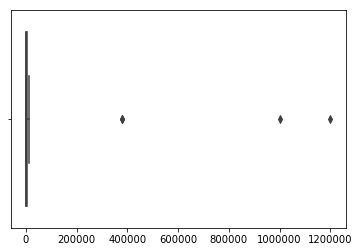

In [490]:
# Veamos su boxplot:
sns.boxplot(x=data_mendoza['expenses'].values);

Vemos que tiene outliers importantes. Los eliminaremos y volvemos a graficar:

In [493]:
# Buscamos outliers:
serie_mendoza_expenses = data_mendoza['expenses']  # Serie de la columna Mendoza
q1 = serie_mendoza_expenses.quantile(0.25)
q2 = serie_mendoza_expenses.quantile(0.50)
q3 = serie_mendoza_expenses.quantile(0.75)

#Rango intercuartil:
iqr = (q3 - q1) * 1.5

#Umbrales:
up_threshold = q3 + iqr
low_threshold = q1 - iqr

print("Límite superior: ", up_threshold)
print("Límite inferior:", low_threshold)

Límite superior:  14725.0
Límite inferior: -7875.0


In [496]:
# Máscaras para filtrar outliers
outlier_mask = np.logical_or(serie_mendoza_expenses>up_threshold, serie_mendoza_expenses<low_threshold)  # Máscara para detectar outliers.
not_outlier_mask = np.logical_not(outlier_mask)                                                          # Máscara para NO outliers.

In [497]:
# Los outliers son:
outliers_expenses_mendoza = serie_mendoza_expenses[outlier_mask]
outliers_expenses_mendoza

88456     380000.0
88474     380000.0
92775    1000000.0
96364    1200000.0
Name: expenses, dtype: float64

In [498]:
# Filtramos no_outliers y vemos los parámetros:
no_outliers_expenses_mendoza = serie_mendoza_expenses[not_outlier_mask]
no_outliers_expenses_mendoza.describe()

count       24.000000
mean      2713.333333
std       2996.506178
min        250.000000
25%        550.000000
50%       1200.000000
75%       4000.000000
max      10500.000000
Name: expenses, dtype: float64

Vemos como mejoró la media del grupo.

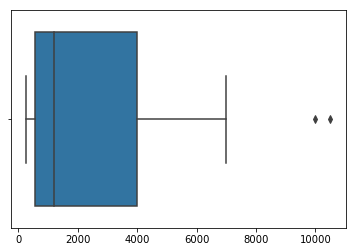

In [499]:
# Graficamos nuevamente los valores ahora sin outliers:
sns.boxplot(x = no_outliers_expenses_mendoza.values);

In [ ]:
# Borramos los outliers de la serie entonces.
serie_mendoza_expenses[outlier_mask] = np.nan   # Asigno NaN a los outliers
serie_mendoza_expenses[outlier_mask]

In [504]:
# Si desearíamos rellenar los NaN con la media sin outlier debemos realizar un fillna de la media
#no_outliers_expenses_mendoza_mean = no_outliers_expenses_mendoza.mean().round(2)
#serie_mendoza_expenses.fillna(no_outliers_expenses_mendoza_mean, inplace=True)

In [511]:
# Guardamos la modificación en el dataframe original:
data.loc[(data['state_name'] == 'Mendoza') & (data['property_type'] == 'apartment'), 'expenses'] = serie_mendoza_expenses

# Volvemos arealizar la sumarizada y vemos lo datos de Mendoza:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                              
property_type                      PH apartment      house    store
state_name                                                         
Bs.As. G.B.A. Zona Norte       613.98   3021.64    5869.71  1564.11
Bs.As. G.B.A. Zona Oeste       266.06   2818.10    3641.73  1190.82
Bs.As. G.B.A. Zona Sur         462.49   1503.66    4589.92  1203.21
Buenos Aires Costa Atlántica   718.57   2042.12    3284.69  2201.57
Buenos Aires Interior          620.00    891.92    4508.27      NaN
Capital Federal                962.73   6634.88    2675.92  2896.55
Chaco                             NaN   2100.00        NaN      NaN
Chubut                            NaN       NaN        NaN  1000.00
Corrientes                     600.80    594.29    3545.56     1.00
Córdoba                       1221.76   3004.11    9401.82  1704.92
Entre Ríos                     400.00    606.86        NaN   300.50
Formosa                           NaN   1120.00        NaN      NaN
La Pampa                          NaN    983.33        NaN      NaN
Mendoza                           NaN   2713.33    5669.54      NaN
Misiones                          NaN   2500.00        NaN      NaN
Neuquén                        517.00   1015.93     964.25   500.00
Río Negro                        1.00   1096.80    2000.50  5500.50
Salta                             NaN   4100.00    2500.00      NaN
San Luis                          NaN    783.33    3801.00      NaN
Santa Fe                       520.00   1429.94  107839.43   812.22
Santiago Del Estero               NaN       NaN       1.00      NaN
Tierra Del Fuego                  NaN       NaN     300.00      NaN
Tucumán                       1500.00   2023.41    2679.63  4516.25

Si realizamos esto mismo para Santa Fe podremos obtener una idea de los valores aproximados de los costos de expesas por provincia y tipo de propiedad.

Usamos el dataframe data, el cual tiene los campos:

---
<a id="section_categorizacion"></a> 
##  Categorización del precio de los inmuebles

[volver a TOC](#section_toc)

Trataremos de categorizar a los precios de los inmuebles mediante intervalos, para tener una noción del rango de precios que maneja la inmobiliaria.

---
<a id="section_graficos"></a> 
##  Gráficos del Dataset

[volver a TOC](#section_toc)

La idea de esta sección es sacar algunas conclusiones sobre los campos calculados e imputados del dataset por medio de gráficos.

Usamos el dataframe que tiene los datos:

In [633]:
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
71419,71419,sell,apartment,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,3427451.0,"-34.599264587,-58.5028803118",-34.599265,-58.502880,360000.0,USD,6352020.00,360000.00,159.0,139.0,2264.150943,2589.928058,NaN,NaN,4100.0,http://www.properati.com.ar/1akxl_venta_depart...,"Imponente piso de 5 ambientes con dependencia,...","Hermoso Piso 5 amb c/dep, dorm suite y esp. gu...",https://thumbs4.properati.com/7/ecOpVhbm3ZNC9I...
50396,50396,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5758816,-58.4376301",-34.575882,-58.437630,120000.0,USD,2117340.00,120000.00,37.0,37.0,3243.243243,3243.243243,NaN,NaN,2000.0,http://www.properati.com.ar/19e9m_venta_depart...,CODIGO: ubicado en: Dorrego 2400 - Publicado...,Departamento 1 Amb Dorrego 2400 Palermo,https://thumbs4.properati.com/3/VVS9iBGHAZraPq...
104879,104879,sell,house,City Bell,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Cit...,Argentina,Bs.As. G.B.A. Zona Sur,3435379.0,NaN,NaN,NaN,125000.0,USD,2205562.50,125000.00,NaN,75.0,NaN,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/1btuy_venta_casa_c...,CASA DESARROLLADA EN UNA PLANTA EN EXCELENTE ...,Casa - City Bell,https://thumbs4.properati.com/4/1eQhbTcLMb--K4...
117599,117599,sell,apartment,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,Argentina,Capital Federal,NaN,NaN,NaN,NaN,103500.0,USD,1826205.75,103500.00,30.0,NaN,3450.000000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cdqd_venta_depart...,Cada unidad contará co...,Departamento - Palermo Hollywood,https://thumbs4.properati.com/9/6_ZDD60a-7Ufel...
62480,62480,sell,apartment,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,3435907.0,"-38.416097,-63.616672",-38.416097,-63.616672,111111.0,ARS,109951.87,6231.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1a74m_venta_depart...,CODIGO: 1818-v152 ubicado en: Costanera 1020 -...,Hermoso departamento frente al mar,https://thumbs4.properati.com/4/z5yyZQ4G-BAdWH...
